# One-way ANOVA test

Supóngase que se un estudio quiere comprobar si existe una diferencia significativa entre el % de bateos exitosos de los jugadores de béisbol dependiendo de la posición en la que juegan. En el caso de que exista, se quiere saber qué posiciones difieren del resto.

## Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg
from statsmodels.graphics.factorplots import interaction_plot

## Loading data

The following table contains a random sample of the league players.

In [4]:
position = ["OF", "IF", "IF", "OF", "IF", "IF", "OF", "OF", "IF", "IF", "OF",
            "OF", "IF", "OF", "IF", "IF", "IF", "OF", "IF", "OF", "IF", "OF",
            "IF", "OF", "IF", "DH", "IF", "IF", "IF", "OF", "IF", "IF", "IF",
            "IF", "OF", "IF", "OF", "IF", "IF", "IF", "IF", "OF", "OF", "IF",
            "OF", "OF", "IF", "IF", "OF", "OF", "IF", "OF", "OF", "OF", "IF",
            "DH", "OF", "OF", "OF", "IF", "IF", "IF", "IF", "OF", "IF", "IF",
            "OF", "IF", "IF", "IF", "OF", "IF", "IF", "OF", "IF", "IF", "IF",
            "IF", "IF", "IF", "OF", "DH", "OF", "OF", "IF", "IF", "IF", "OF",
            "IF", "OF", "IF", "IF", "IF", "IF", "OF", "OF", "OF", "DH", "OF",
            "IF", "IF", "OF", "OF", "C", "IF", "OF", "OF", "IF", "OF", "IF",
            "IF", "IF", "OF", "C", "OF", "IF", "C", "OF", "IF", "DH", "C", "OF",
            "OF", "IF", "C", "IF", "IF", "IF", "IF", "IF", "IF", "OF", "C", "IF",
            "OF", "OF", "IF", "OF", "IF", "OF", "DH", "C", "IF", "OF", "IF",
            "IF", "OF", "IF", "OF", "IF", "C", "IF", "IF", "OF", "IF", "IF",
            "IF", "OF", "OF", "OF", "IF", "IF", "C", "IF", "C", "C", "OF", "OF",
            "OF", "IF", "OF", "IF", "C", "DH", "DH", "C", "OF", "IF", "OF", "IF",
            "IF", "IF", "C", "IF", "OF", "DH", "IF", "IF", "IF", "OF", "OF", "C",
            "OF", "OF", "IF", "IF", "OF", "OF", "OF", "OF", "OF", "OF", "IF",
            "IF", "DH", "OF", "IF", "IF", "OF", "IF", "IF", "IF", "IF", "OF",
            "IF", "C", "IF", "IF", "C", "IF", "OF", "IF", "DH", "C", "OF", "C",
            "IF", "IF", "OF", "C", "IF", "IF", "IF", "C", "C", "C", "OF", "OF",
            "IF", "IF", "IF", "IF", "OF", "OF", "C", "IF", "IF", "OF", "C", "OF",
            "OF", "OF", "OF", "OF", "OF", "OF", "OF", "OF", "OF", "OF", "C",
            "IF", "DH", "IF", "C", "DH", "C", "IF", "C", "OF", "C", "C", "IF",
            "OF", "IF", "IF", "IF", "IF", "IF", "IF", "IF", "IF", "OF", "OF",
            "OF", "IF", "OF", "OF", "IF", "IF", "IF", "OF", "C", "IF", "IF",
            "IF", "IF", "OF", "OF", "IF", "OF", "IF", "OF", "OF", "OF", "IF",
            "OF", "OF", "IF", "OF", "IF", "C", "IF", "IF", "C", "DH", "OF", "IF",
            "C", "C", "IF", "C", "IF", "OF", "C", "C", "OF"]

batting = [0.359, 0.34, 0.33, 0.341, 0.366, 0.333, 0.37, 0.331, 0.381, 0.332,
          0.365, 0.345, 0.313, 0.325, 0.327, 0.337, 0.336, 0.291, 0.34, 0.31,
          0.365, 0.356, 0.35, 0.39, 0.388, 0.345, 0.27, 0.306, 0.393, 0.331,
          0.365, 0.369, 0.342, 0.329, 0.376, 0.414, 0.327, 0.354, 0.321, 0.37,
          0.313, 0.341, 0.325, 0.312, 0.346, 0.34, 0.401, 0.372, 0.352, 0.354,
          0.341, 0.365, 0.333, 0.378, 0.385, 0.287, 0.303, 0.334, 0.359, 0.352,
          0.321, 0.323, 0.302, 0.349, 0.32, 0.356, 0.34, 0.393, 0.288, 0.339,
          0.388, 0.283, 0.311, 0.401, 0.353, 0.42, 0.393, 0.347, 0.424, 0.378,
          0.346, 0.355, 0.322, 0.341, 0.306, 0.329, 0.271, 0.32, 0.308, 0.322,
          0.388, 0.351, 0.341, 0.31, 0.393, 0.411, 0.323, 0.37, 0.364, 0.321,
          0.351, 0.329, 0.327, 0.402, 0.32, 0.353, 0.319, 0.319, 0.343, 0.288,
          0.32, 0.338, 0.322, 0.303, 0.356, 0.303, 0.351, 0.325, 0.325, 0.361,
          0.375, 0.341, 0.383, 0.328, 0.3, 0.277, 0.359, 0.358, 0.381, 0.324,
          0.293, 0.324, 0.329, 0.294, 0.32, 0.361, 0.347, 0.317, 0.316, 0.342,
          0.368, 0.319, 0.317, 0.302, 0.321, 0.336, 0.347, 0.279, 0.309, 0.358,
          0.318, 0.342, 0.299, 0.332, 0.349, 0.387, 0.335, 0.358, 0.312, 0.307,
          0.28, 0.344, 0.314, 0.24, 0.331, 0.357, 0.346, 0.351, 0.293, 0.308,
          0.374, 0.362, 0.294, 0.314, 0.374, 0.315, 0.324, 0.382, 0.353, 0.305,
          0.338, 0.366, 0.357, 0.326, 0.332, 0.323, 0.306, 0.31, 0.31, 0.333,
          0.34, 0.4, 0.389, 0.308, 0.411, 0.278, 0.326, 0.335, 0.316, 0.371,
          0.314, 0.384, 0.379, 0.32, 0.395, 0.347, 0.307, 0.326, 0.316, 0.341,
          0.308, 0.327, 0.337, 0.36, 0.32, 0.372, 0.306, 0.305, 0.347, 0.281,
          0.281, 0.296, 0.306, 0.343, 0.378, 0.393, 0.337, 0.327, 0.336, 0.32,
          0.381, 0.306, 0.358, 0.311, 0.284, 0.364, 0.315, 0.342, 0.367, 0.307,
          0.351, 0.372, 0.304, 0.296, 0.332, 0.312, 0.437, 0.295, 0.316, 0.298,
          0.302, 0.342, 0.364, 0.304, 0.295, 0.305, 0.359, 0.335, 0.338, 0.341,
          0.3, 0.378, 0.412, 0.273, 0.308, 0.309, 0.263, 0.291, 0.359, 0.352,
          0.262, 0.274, 0.334, 0.343, 0.267, 0.321, 0.3, 0.327, 0.313, 0.316,
          0.337, 0.268, 0.342, 0.292, 0.39, 0.332, 0.315, 0.298, 0.298, 0.331,
          0.361, 0.272, 0.287, 0.34, 0.317, 0.327, 0.354, 0.317, 0.311, 0.174,
          0.302, 0.302, 0.291, 0.29, 0.268, 0.352, 0.341, 0.265, 0.307, 0.36,
          0.305, 0.254, 0.279, 0.321, 0.305, 0.35, 0.308, 0.326, 0.219, 0.23,
          0.322, 0.405, 0.321, 0.291, 0.312, 0.357, 0.324]

In [6]:
data = pd.DataFrame({'position': position, 'batting': batting})
data.head(10)

,position,batting
0,OF,0.359
1,IF,0.340
2,IF,0.330
3,OF,0.341
4,IF,0.366
5,IF,0.333
6,OF,0.370
7,OF,0.331
8,IF,0.381
9,IF,0.332


## Number of groups, obervations per group, and observation distribution

Identify the number of groups and observations by group to determine if is an equilibrated model. Also calculate the mean and standard deviation for each group.

### Observations by group

In [8]:
data.groupby('position').size()

position
C      39
DH     14
IF    154
OF    120
dtype: int64

### Mean and standard deviation by group

In [9]:
data.groupby('position').agg(['mean', 'std'])

batting          
              mean       std
position                    
C         0.322615  0.045132
DH        0.347786  0.036037
IF        0.331526  0.037095
OF        0.334250  0.029444

## Plot analysis

Two of the most useful plots before performing ANOVA are the Box-Plot and Violin-Plot graphics.

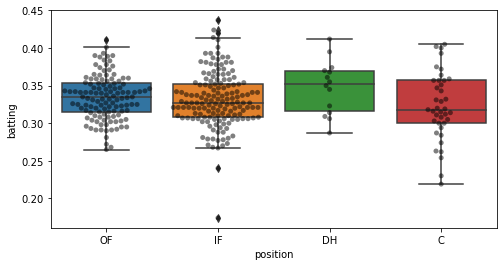

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
sns.boxplot(x="position", y="batting", data=data, ax=ax)
sns.swarmplot(x="position", y="batting", data=data, color='black', alpha = 0.5, ax=ax);

This type of representation allows preliminary identification of whether there are asymmetries, outliers or differences in variances. In this case, the 4 groups seem to follow a symmetric distribution. At the IF level, some extreme values ​​are detected that will have to be studied in detail in case it is necessary to eliminate them. The size of the boxes is similar for all levels, so there are no indications of lack of homoscedasticity.

## Verify conditions for ANOVA

### Independence

The groups (categorical variable) and players within each group are independent of each other since a random sampling of players from the entire league (not just from the same team) has been made.

### Normal distribution of observations

The quantitative variable must be distributed normally in each of the groups. The normality study can be done graphically (qqplot) or with a hypothesis test.

### QQplot graphics

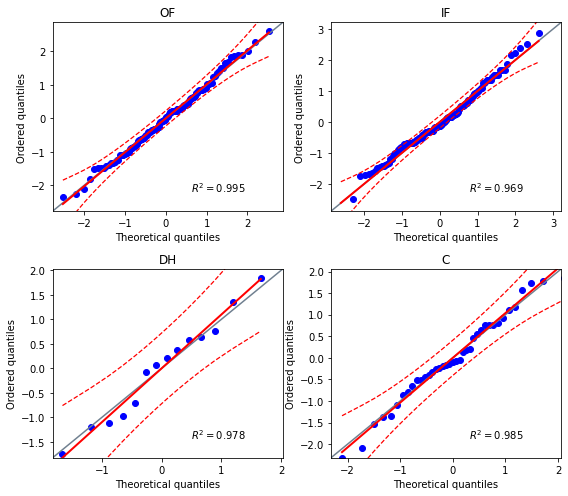

In [13]:
fig, axs = plt.subplots(2, 2, figsize=(8, 7))
pg.qqplot(data.loc[data.position=='OF', 'batting'], dist='norm', ax=axs[0,0])
axs[0,0].set_title('OF')
pg.qqplot(data.loc[data.position=='IF', 'batting'], dist='norm', ax=axs[0,1])
axs[0,1].set_title('IF')
pg.qqplot(data.loc[data.position=='DH', 'batting'], dist='norm', ax=axs[1,0])
axs[1,0].set_title('DH')
pg.qqplot(data.loc[data.position=='C', 'batting'], dist='norm', ax=axs[1,1])
axs[1,1].set_title('C')
plt.tight_layout()

### Shapiro-Wilk normality test

In [15]:
pg.normality(data=data, dv='batting', group='position')

,W,pval,normal
OF,0.993360,0.842232,True
IF,0.974848,0.006405,False
DH,0.972156,0.904092,True
C,0.980154,0.709167,True


Neither the graphical analysis nor the hypothesis tests do not show evidence of a lack of normality.

### Constant variance between groups (homoscedasticity)

Since there is an IF group that is in the limit to accept that it is normally distributed, Levene's test is more appropriate than Bartlett's.

In [17]:
pg.homoscedasticity(data=data, dv='batting', group='position', method='levene')

,W,pval,equal_var
levene,2.605659,0.051799,True


According to the Levene test, there is no significant evidence indicating lack of homoscedasticity.

## Test ANOVA

One-way ANOVA

In [19]:
pg.anova(data=data, dv='batting', between='position', detailed=True)

,Source,SS,DF,MS,F,p-unc,np2
0,position,0.007557,3,0.002519,1.994349,0.114693,0.018186
1,Within,0.407984,323,0.001263,NaN,NaN,NaN


A p-value greater than 0.1 is very weak evidence against the null hypothesis that all groups have the same mean. The value of eta squared ( 𝜂2 ) is 0.018, which can be considered a small effect size.

## Conclusion

In the study carried out, a small effect size has been observed and the ANOVA inference techniques have not found statistical significance to reject that the means are the same between all the groups.